In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#. let's read our dataset from the corresponding txt file

In [8]:
learning_set_path = "./ex1data1.txt"
learning_data = pd.read_csv(learning_set_path, header=None, names=['Population', 'Profit'])


#. convince ourself by printing first few raws from the learning dataset


In [9]:
print(learning_data.head())

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


#. plot a scatter graph to see the pattern between Population and Profit

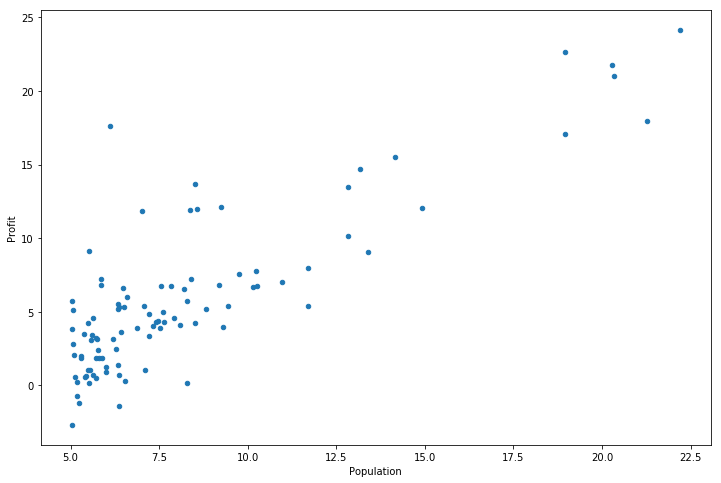

In [17]:
learning_data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

Notice that as greater the population of the city as higher the profit

as we deal with binary regression and we want further get benefit from linear algebra tools
let's insert a bias unit feature for constant factor as ones

In [23]:
learning_data.insert(0, 'Ones', 1)

ValueError: cannot insert Ones, already exists

In [24]:
print(learning_data.head())

   Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233


extract features from learning_data (all columns except the last one)

In [30]:
cols = learning_data.shape[1]
print(cols)
X = learning_data.iloc[:,0:cols-1]
print(X.head())

3
   Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598


extract the result set from learning_data

In [32]:
y = learning_data.iloc[:,cols-1:cols]
y.head()

Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233

convert pandas dataframe to numpy matrixes (easier to work with them)

In [40]:
X = np.matrix(X.values)
y = np.matrix(y.values)

AttributeError: 'matrix' object has no attribute 'values'

In [47]:
print y.shape, X.shape  # print the shape of each matrix

(97, 1) (97, 2)


### Simple Linear regression using gradient descent

1. Initialize theta vector (vector of weights) as 0s (for binary regression we have w0 and w1)

In [46]:
theta = np.matrix(np.array([0,0]))
print (theta.shape)

(1, 2)


compute_cost - Function that calculates quality of the algorithm 

In [50]:
def computeCost(X, y, theta):
   """
   param X: matrix [lxd] that describes object set with d features
   type X: numpy matrix
   param y: answer vector from learning set
   type y: numpy matrix [lx1]
   param theta: current vector of weights
   type theta: numpy matrix [1x1]
   
   return: resulting cost that describes the quality of our model
   rtype: float
   """
   # least squares loss function
   l = len(X) # size of learning set
   inner = np.power(((X * theta.T) - y), 2)   # error vector
   return np.sum(inner) / (2 * l)   # averaging error using values in vector

compute cost on initial theta values

In [51]:
print('\n\n Final cost: {0:.2f}'.format(computeCost(X, y, theta)))




 Final cost: 32.07


Notice how big error is (it should achieve to 0)

## Optimize with gradient descent algorithm

Now we need to define a function to perform gradient descent on the parameters *theta*
using the special update rules.

In [58]:
def gradientDescent(X, y, theta, alpha, iters):
    """
    param X: matrix [lxd] that describes object set with d features
    type X: numpy matrix
    param y: answer vector from learning set
    type y: numpy matrix [lx1]
    param theta: current vector of weights
    type theta: numpy matrix [1x1]
    param alpha: gradient step
    type alpha: numeric
    param iters: max number of iterations
    type iters: int
    return: resulting theta (vector of weights) and cost where algorithm has stopped
    rtype: tuple(numpy matrix, cost array of number of iterations)
   """
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for t in range(iters):
        error = (X * theta.T) - y   # Xw - y
    
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))  # 
            theta = temp   # update theta vector at item-j
        # compute cost with optimized theta at this step
        cost[t] = computeCost(X, y, theta)
    return theta, cost

Let's check how optimization algorithm works comparing it by number of operations with the same step

In [66]:
alpha = 0.01
iters = 10
theta1, cost1 = gradientDescent(X, y, theta, alpha, iters)
print('\n\n Final cost: {0:.2f}'.format(computeCost(X, y, theta1)))
alpha = 0.01
iters = 1000
theta2, cost2 = gradientDescent(X, y, theta, alpha, iters)
print('\n\n Final cost: {0:.2f}'.format(computeCost(X, y, theta2)))




 Final cost: 5.86


 Final cost: 4.52


Notice that 1000 iterations approximates much better

Let's plot now our resulting approximation function and compare it with the actual results

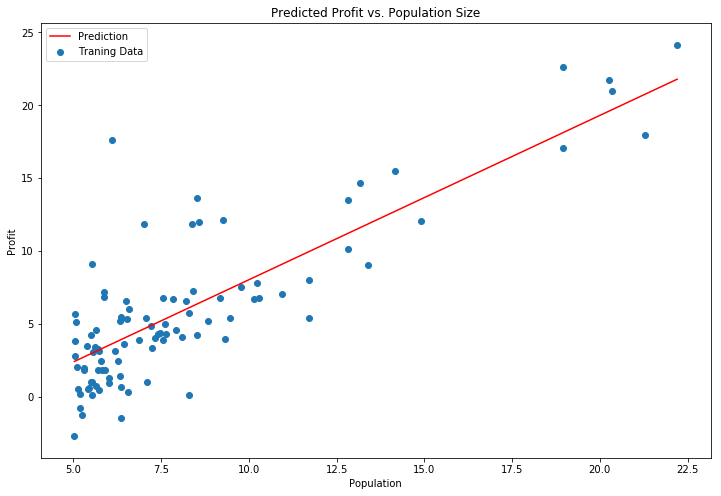

In [68]:
x = np.linspace(learning_data.Population.min(), learning_data.Population.max(), 100)
f = theta2[0, 0] + (theta2[0, 1] * x)   # a(x) = w0 + w1*x
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(learning_data.Population, learning_data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

Notice that approximation function is quite good and shows normal quality results

Draw a cost function now

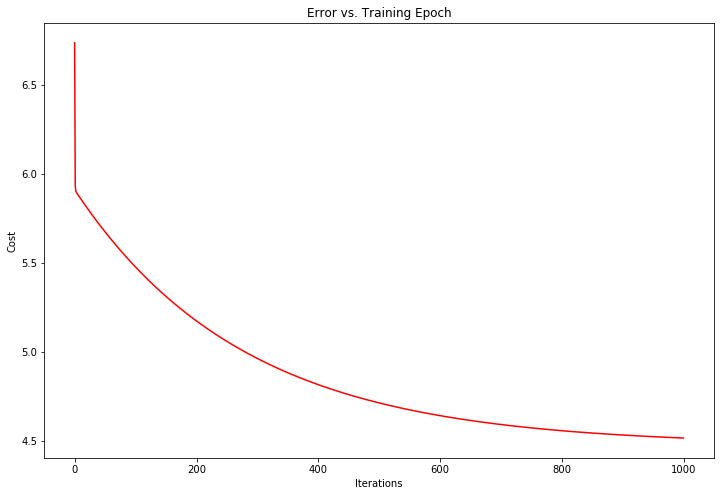

In [71]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()